Try quadratic in the total costs of the profit function.

In [1]:
# Cite:
# https://github.com/PharmCat/MvNormalCDF.jl

Revise: Check what would happen if we reduce the number of Consumers to 100 (same method in DVC_Clean_Julia01_experiment_v2.3).

Keep the parameters as 2 as before.

In [1]:
# import packages
using Distributions, Random, MvNormalCDF
using Query, Plots, StatsPlots
using DataFrames, CSV, Dates

LoadError: ArgumentError: Package Distributions not found in current path.
- Run `import Pkg; Pkg.add("Distributions")` to install the Distributions package.

Define the functions

In [3]:
# Example functions of deltap: from the investment to the value brought by the developers
## Linear

# function deltap_a(c_0_a) # original: 2
#     2 * c_0_a
# end

# function deltap_b(c_0_b)
#     2 * c_0_b
# end

## Quadratic

function deltap_a(c_0_a) # original: 2
    2 * c_0_a
end

function deltap_b(c_0_b)
    2 * c_0_b
end

deltap_b (generic function with 1 method)

In [4]:
# Example functionality of softwares

function theta_func(theta_1_bar_a, c_0_a)
    theta_1_bar_a + 2 * c_0_a
end    

theta_func (generic function with 1 method)

In [5]:
# Example utility function of customer

function util(u_bar_a, x_1, y_1, theta_1, c_0_a, p_s_a)
    u_bar_a + x_1 * theta_1 + y_1 * c_0_a - p_s_a
end

util (generic function with 1 method)

In [6]:
# Example total cost

function c_total_a(c_0_a, m, c_res_a)
#     c_0_a^3 + m * c_res_a
    c_0_a^4 + m * c_res_a
end

c_total_a (generic function with 1 method)

In [7]:
# Example functions of profits of owners (firms a and b)

function profit_a(m, price_s_a, c_0_a, c_res_a)
#     m * price_s_a - c_0_a^3 - m * c_res_a
    m * price_s_a - c_0_a^4 - m * c_res_a
end

profit_a (generic function with 1 method)

Joint distribution of customers

In [8]:
# By now we assume that both follow normal distributions
# x ~ N(0.8, 0.05) # tbd: evidence?
# y ~ N(0, 0.05)
# Joint dist.: correlation = 0 # tbd: evidence?

# Draw the bivariate joint dist.
mu = [0.8; 0];
sigma = [0.05^2 0; 0 0.2^2];
dist01 = MvNormal(mu, sigma);

In [9]:
# Bivariate Normal dist.
a = [0; -1]
b = [1; 1]
# m: number of integration points (default 1000*dimension)
(p,e) = mvnormcdf(mu, sigma, a, b; m = 2000) # Multivariate Normal probability integral

(0.9999677554731808, 0.0)

In [10]:
# Sampling
Random.seed!(123);
rand_sample01 = rand(dist01,100)';
# rand_sample01 = rand(dist01,1000)'; # 1000; 100;

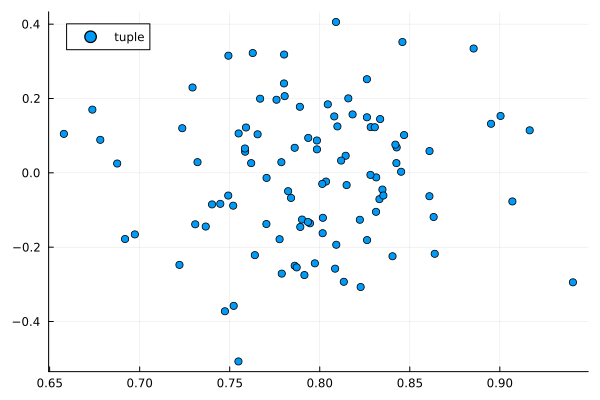

In [11]:
x = rand_sample01[:,1]
y = rand_sample01[:,2]
plot(x, y, seriestype=:scatter, label="tuple")

In [12]:
# Check range: should be restricted to the range [0,1] and [-1,1]
[minimum(x), maximum(x), minimum(y), maximum(y)]

4-element Vector{Float64}:
  0.6579027424502671
  0.940596384807489
 -0.5073372309626357
  0.4057822970905063

In [13]:
# Save the sample values
rand_sample01

100×2 adjoint(::Matrix{Float64}) with eltype Float64:
 0.840414  -0.224415
 0.744768  -0.0833985
 0.814379   0.0459637
 0.778912  -0.271118
 0.803473  -0.0234646
 0.860964   0.0585829
 0.798443   0.0631666
 0.691881  -0.178015
 0.842712   0.0683564
 0.784056  -0.0674909
 0.900406   0.153006
 0.809013   0.405782
 0.793618   0.0938954
 ⋮         
 0.793428  -0.132125
 0.732116   0.0287385
 0.747336  -0.372387
 0.749183  -0.0611277
 0.835332  -0.0609882
 0.758454   0.0655173
 0.811887   0.0330049
 0.940596  -0.294526
 0.801731  -0.120972
 0.787192  -0.254397
 0.754843  -0.507337
 0.79728   -0.243465

In [14]:
df_rand_sample01 = DataFrame(s = x, st_R = y)

Row,s,st_R
,Float64,Float64
1,0.840414,-0.224415
2,0.744768,-0.0833985
3,0.814379,0.0459637
4,0.778912,-0.271118
5,0.803473,-0.0234646
6,0.860964,0.0585829
7,0.798443,0.0631666
8,0.691881,-0.178015
9,0.842712,0.0683564


In [114]:
# CSV.write("C:\\Users\\zwang3\\Downloads\\rand_sample01_n_1000.csv", df_rand_sample01)

Draw another distribution

In [42]:
# Draw the bivariate joint dist.
mu = [0.5; 0.5];
sigma = [0.05^2 0; 0 0.1^2];
dist01 = MvNormal(mu, sigma);
# Bivariate Normal dist.
a = [0; -1]
b = [1; 1]
# m: number of integration points (default 1000*dimension)
(p,e) = mvnormcdf(mu, sigma, a, b; m = 2000) # Multivariate Normal probability integral

(0.9999997133484277, 0.0)

In [48]:
# Sampling
Random.seed!(1);
rand_sample01 = rand(dist01,100)';
# rand_sample01 = rand(dist01,1000)'; # 1000; 100;

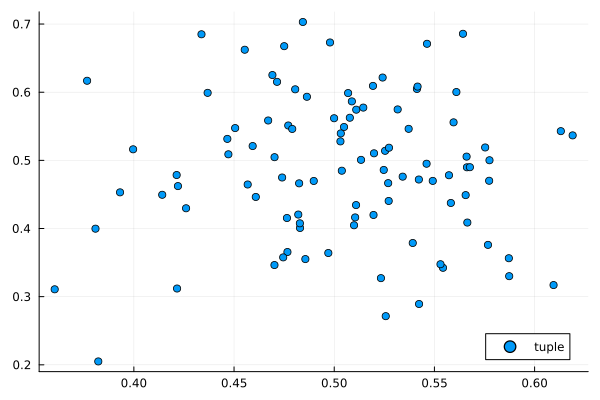

In [49]:
x = rand_sample01[:,1]
y = rand_sample01[:,2]
plot(x, y, seriestype=:scatter, label="tuple")

In [50]:
df_rand_sample01 = DataFrame(s = x, st_R = y)

Row,s,st_R
,Float64,Float64
1,0.503097,0.527841
2,0.470209,0.504666
3,0.55429,0.342344
4,0.508797,0.586538
5,0.360486,0.310798
6,0.510894,0.434405
7,0.513376,0.500739
8,0.553036,0.347573
9,0.460853,0.446299


In [51]:
# Check range: should be restricted to the range [0,1] and [-1,1]
[minimum(x), maximum(x), minimum(y), maximum(y)]

4-element Vector{Float64}:
 0.36048594972253467
 0.6189916566157027
 0.20495077488817065
 0.7030393808218989

In [52]:
CSV.write("rand_sample03_new_100.csv", df_rand_sample01)

"rand_sample03_new_100.csv"

Draw another distribution: Normal + Bimodal

In [54]:
# Define the mean and standard deviation for the normal distribution (x)
mu_x = 0.0
sigma_x = 1.0

# Create a normal distribution for x
x_distribution = Normal(mu_x, sigma_x)

# # Generate random points (x, y)
# num_points = 100  # Adjust the number of points as needed
# random_points = [(rand(x_distribution), rand(y_distribution)) for _ in 1:num_points]

Normal{Float64}(μ=0.0, σ=1.0)

In [55]:
# Define parameters for the bimodal distribution (y)
modes = [-2.0, 2.0]
weights = [0.5, 0.5]

2-element Vector{Float64}:
 0.5
 0.5

In [57]:
# Create a bimodal distribution for y
# y_distribution = MixtureModel(Normal[modes[1], modes[2]], weights)

# using Random

# Set a seed for reproducibility (optional)
Random.seed!(123)

# Define the proportions or weights of the modes
weights = [0.4, 0.6]  # Adjust these as needed

# Define the parameters for the first mode
mu1 = -2.0
sigma1 = 1.0

# Define the parameters for the second mode
mu2 = 2.0
sigma2 = 1.0

# Randomly select the mode based on the weights
mode = rand([1, 2], weights)

# Generate a random variable based on the selected mode
if mode == 1
    bimodal_variable = mu1 + sigma1 * randn()
else
    bimodal_variable = mu2 + sigma2 * randn()
end

# Print the generated bimodal variable
println("Bimodal Variable: $bimodal_variable")

LoadError: MethodError: no method matching rand(::Vector{Int64}, ::Vector{Float64})
[0mClosest candidates are:
[0m  rand([91m::AbstractRNG[39m, ::AbstractArray, [91m::Type{SA}[39m) where SA<:StaticArraysCore.StaticArray at C:\Users\think\.julia\packages\StaticArrays\pTgFe\src\arraymath.jl:87
[0m  rand(::AbstractArray, [91m::Type{SA}[39m) where SA<:StaticArraysCore.StaticArray at C:\Users\think\.julia\packages\StaticArrays\pTgFe\src\arraymath.jl:88
[0m  rand([91m::AbstractRNG[39m, ::Any) at C:\Users\think\AppData\Local\Programs\julia-1.8.5\share\julia\stdlib\v1.8\Random\src\Random.jl:254
[0m  ...

Check the scenarios

In [115]:
# CSV.read("C:\\Users\\zwang3\\Downloads\\rand_sample01_n_1000.csv", DataFrame) #; delim=","

In [116]:
# One certain setup

# policy factor: data restriction
c_res_a = 5; c_res_b = 5

# cost of contract
c_0_a = 60; c_0_b = 60

# fundamental 
theta_1_bar_a_value = 0.8; theta_1_bar_b_value = 0.8

# functionality
theta_1_value_a = theta_func(theta_1_bar_a_value, c_0_a)
theta_1_value_b = theta_func(theta_1_bar_b_value, c_0_b)

# utility constant
u_bar_a = 100; u_bar_b = 100;

# number of customers
n_customers = 100;

In [117]:
# check Consumers' tastes
s = x; 
st_R = y;

# reserved utility
ru = 50; # homogenous

In [118]:
# above checked

Visualization of the equilibrium point.

In [119]:
n_customers

100

Here we assume that the maximum investment an Owner can choose is 200.

In [139]:
# initial settings
# policy factor: data restriction
c_res_a = 10; c_res_b = 10;

# cost of contract # adjust this
c_0_a = 2.3; c_0_b = 2.3; # 0, 50, 100, 150, 200, 250, 300

# fundamental 
theta_1_bar_a_value = 0.8; theta_1_bar_b_value = 0.8

# functionality
theta_1_value_a = theta_func(theta_1_bar_a_value, c_0_a);
theta_1_value_b = theta_func(theta_1_bar_b_value, c_0_b);

# about 50 rounds for high and low rounds altogether, 50 rounds for asymmetric
# in total about 100 rounds, about 1400 min., 23h
# reduce: only low restriction, 75 rounds

In [140]:
# Simpler method: Reducing the size of the other set 
## from now on we suggest the the maximum investment of a firm is 100
## thanks for Nurten's suggestion

timest1 = now() # estimate the run time

Random.seed!(123);

pricelist1 = []
maxpricelist1 = [] # track the best response of b

search_range = 200;

for jj in 1:search_range # 100, 200

    price_s_a = jj # Under certain price jj, check the best response of b
    pricelist1 = []
    
    for ii in 1:search_range

        price_s_b = ii

        # Trial: Utility
        utili_a = []
        utili_b = []
        for i in 1:n_customers
            append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
            append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
        end

        # buy randomly from one company if the utilities are the same
        dist_bin = Binomial(1, 0.5); # (n,p)
        bin = rand(dist_bin, n_customers)';

        # count the numbers of purchase: buy - from a; buy2 - from b;
        buy = []; buy2 = [];

        for j in 1:n_customers
            if ru <= max(utili_a[j], utili_b[j])
                if utili_a[j] > utili_b[j]
                    append!(buy, 1);
                elseif utili_a[j] < utili_b[j]
                    append!(buy2, 1);
                else
                    append!(buy, bin[j]);
                    append!(buy2, 1-bin[j]);
                end
            else
            end
        end

        # Count the purchases
        append!(buy, 0) # get rid of Any([])
        append!(buy2, 0)

        m1 = sum(buy)
        m2 = sum(buy2)
        pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a)
        pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b)

        append!(pricelist1, pr2)

    end

    # Find which price could bring the maximum profit
    indx = minimum(findall(x -> x == maximum(pricelist1), pricelist1))
    append!(maxpricelist1, range(1, search_range)[indx]) # 100, 200
    
end

# Find the certain list

# maxpricelist1 # set of the BR of b under different prices of a
search_range2 = union(maxpricelist1) # the possible BR of b, duplicates in the list dropped

Random.seed!(123);

pricelist2 = []
maxpricelist2 = [] # track the best response of b

for jj in search_range2

    price_s_b = jj # Under certain price jj, check the best response of b
    pricelist2 = []
    
    for ii in 1:search_range

        price_s_a = ii

        # Trial: Utility
        utili_a = []
        utili_b = []
        for i in 1:n_customers
            append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
            append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
        end

        # buy randomly from one company if the utilities are the same
        dist_bin = Binomial(1, 0.5); # (n,p)
        bin = rand(dist_bin, n_customers)';

        # count the numbers of purchase: buy - from a; buy2 - from b;
        buy = []; buy2 = [];

        for j in 1:n_customers
            if ru <= max(utili_a[j], utili_b[j])
                if utili_a[j] > utili_b[j]
                    append!(buy, 1);
                elseif utili_a[j] < utili_b[j]
                    append!(buy2, 1);
                else
                    append!(buy, bin[j]);
                    append!(buy2, 1-bin[j]);
                end
            else
            end
        end

        # Count the purchases
        append!(buy, 0) # get rid of Any([])
        append!(buy2, 0)

        m1 = sum(buy)
        m2 = sum(buy2)
        pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a)
        pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b)

        append!(pricelist2, pr1)

    end

    # Find which price could bring the maximum profit
    indx = minimum(findall(x -> x == maximum(pricelist2), pricelist2))
    append!(maxpricelist2, range(1, search_range)[indx])
    
end

# Find the possible solutions 
# maxpricelist2 # set of the BR of a under different prices of b

tuple_b = tuple.(range(1, search_range, step = 1), maxpricelist1);
tuple_a = tuple.(maxpricelist2, search_range2);

# Find the same element of the vector: get the equilibrium prices (p_a*, p_b*)
set00 = intersect(Set(tuple_a),Set(tuple_b));

# Check the results under the equilibrium
# for just in range(1,100):
price_s_a = getfield.(set00, 1)[1]; price_s_b = getfield.(set00, 2)[1]; # derived from last step

In [141]:
timest2 = now() # estimate the run time: 100 Consumers, not even one minute!
timest2 - timest1 # next: 70, 100

22876 milliseconds

In [142]:
# trial

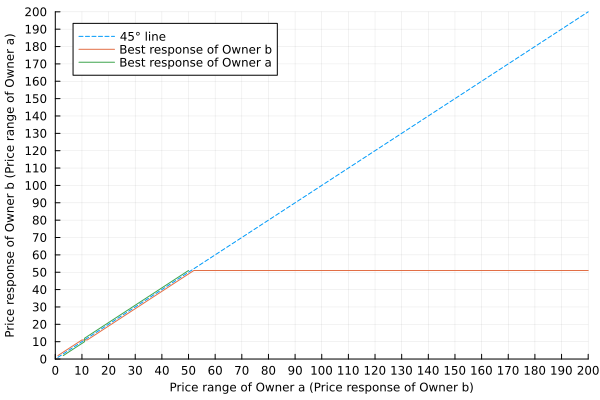

In [143]:
plot(1:200, 1:200, label = "45° line", ls=:dash) # , aspect_ratio = 1
xlabel!("Price range of Owner a (Price response of Owner b)")
ylabel!("Price response of Owner b (Price range of Owner a)")
plot!(xlabelfontsize=8, ylabelfontsize=8)
plot!(range(1, search_range, step = 1), maxpricelist1, label = "Best response of Owner b", lw=1)
plot!(maxpricelist2, search_range2, label = "Best response of Owner a", lw=1)
xlims!(0, 200)
ylims!(0, 200)
xticks!(0:10:200)
yticks!(0:10:200)

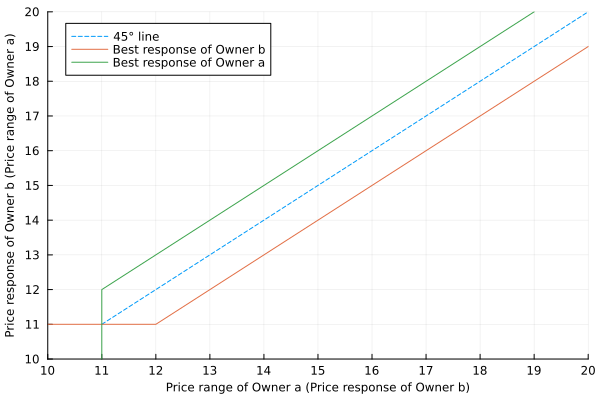

In [146]:
# Draw the range
x_start = 10
y_start = 10
plot(x_start + 1 : x_start + 10, 
    y_start + 1 : y_start + 10, 
    label = "45° line", ls=:dash) # , aspect_ratio = 1
xlabel!("Price range of Owner a (Price response of Owner b)")
ylabel!("Price response of Owner b (Price range of Owner a)")
plot!(xlabelfontsize=8, ylabelfontsize=8)
plot!(range(1, search_range, step = 1), maxpricelist1, label = "Best response of Owner b", lw=1)
plot!(maxpricelist2, search_range2, label = "Best response of Owner a", lw=1)
xlims!(x_start + 0, x_start + 10)
ylims!(y_start + 0, y_start + 10)
xticks!(x_start + 0:1:x_start + 10)
yticks!(y_start + 0:1:y_start + 10)

In [145]:
price_s_a, price_s_b

(11, 11)

In [136]:
# price_s_a = 12.5; price_s_b = 41.5;
# price_s_a = 13.5; price_s_b = 56.5;
# price_s_a = 14.5; price_s_b = 71.5;
# price_s_a = 15.5; price_s_b = 87.5;
# price_s_a = 16.5; price_s_b = 102.5;
# price_s_a, price_s_b

In [147]:
# Under the equilibrium prices

# c_res_a = 0; c_res_b = 0;

# #!!!!!!

# c_0_a = 60; c_0_b = 60;
# theta_1_bar_a_value = 0.8; theta_1_bar_b_value = 0.8
# theta_1_value_a = theta_func(theta_1_bar_a_value, c_0_a)
# theta_1_value_b = theta_func(theta_1_bar_b_value, c_0_b)

# price_s_a = 1; price_s_b = 1;

Random.seed!(123);

# Trial: Utility
utili_a = []
utili_b = []
for i in range(1, n_customers)
    append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
    append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
end

# buy randomly from one company if the utilities are the same
dist_bin = Binomial(1, 0.5); # (n,p)
bin = rand(dist_bin, n_customers)';

# count the numbers of purchase: buy - from a; buy2 - from b;
buy = []; buy2 = []; welf = [];

for j in range(1, n_customers)
    if ru <= max(utili_a[j], utili_b[j])
        if utili_a[j] > utili_b[j]
            append!(buy, 1);
            append!(welf, utili_a[j]);
        elseif utili_a[j] < utili_b[j]
            append!(buy2, 1);
            append!(welf, utili_b[j]);
        else
            append!(buy, bin[j]);
            append!(buy2, 1-bin[j]);
            append!(welf, utili_a[j]);
        end
    else
    end
end

# Count the purchases
append!(buy, 0) # get rid of Any([])
append!(buy2, 0)

m1 = sum(buy);
m2 = sum(buy2);

# Objective functions regarding the global welfare
agg_total_cost = deltap_a(c_0_a) + m1 * c_res_a + deltap_a(c_0_b) + m2 * c_res_b
agg_welfare = sum(welf) - agg_total_cost

pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a);
pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b);
total_pr = pr1 + pr2; 

# c_0_a, c_0_b, m1, m2, pr1, pr2, total_pr, agg_welfare
trial_new = [c_0_a c_0_b price_s_a price_s_b m1 m2 pr1 pr2 total_pr agg_welfare]
# trial_new = vcat(trial_new, trial)

1×10 Matrix{Float64}:
 2.3  2.3  11.0  11.0  45.0  55.0  17.0159  27.0159  44.0318  8311.41

In [148]:
# trial = trial_new
trial = vcat(trial, trial_new)

3×10 Matrix{Float64}:
 2.3  2.3   1.0   1.0  45.0  55.0    17.0159  27.0159    44.0318  10320.2
 3.4  0.6  13.0  11.0  92.0   8.0  1062.37     7.8704  1070.24     9221.96
 2.3  2.3  11.0  11.0  45.0  55.0    17.0159  27.0159    44.0318   8311.41

In [149]:
trial_values = trial
df_equil_new001 = DataFrame(
#     c_res_a = [0, 0, 0, 0, 10], c_res_b = [0, 0, 0, 10, 10], 
    c_res_a = [0, 0, 10], c_res_b = [0, 10, 10], 
    c_0_a = trial_values[:, 1], c_0_b = trial_values[:, 2],
    price_s_a = trial_values[:, 3], price_s_b = trial_values[:, 4],
    m1 = trial_values[:, 5], m2 = trial_values[:, 6],
    pr1 = trial_values[:, 7], pr2 = trial_values[:, 8],
    total_pr = trial_values[:, 9], agg_welfare = trial_values[:, 10]
)

Row,c_res_a,c_res_b,c_0_a,c_0_b,price_s_a,price_s_b,m1,m2,pr1,pr2,total_pr,agg_welfare
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0,0,2.3,2.3,1.0,1.0,45.0,55.0,17.0159,27.0159,44.0318,10320.2
2,0,10,3.4,0.6,13.0,11.0,92.0,8.0,1062.37,7.8704,1070.24,9221.96
3,10,10,2.3,2.3,11.0,11.0,45.0,55.0,17.0159,27.0159,44.0318,8311.41


In [89]:
# trial_values[:, 1]

In [96]:
# table_append = DataFrame(c_res_a = [0, 0, 0, 0, 10], c_res_b = [0, 0, 0, 10, 10], c_0_a = trial_values[:, 1])

In [97]:
# innerjoin(table_append, df_equil_new001, on = :c_0_a)

In [98]:
# df_equil_new001.loc[:,"c_res_a"] = 0

In [150]:
# CSV.write("C:\\Users\\zwang3\\Downloads\\df_equil_new002_0809_res_10_10.csv", df_equil_new001) # tbd: save!
CSV.write("df_equil_new002_0809_order4.csv", df_equil_new001)

"df_equil_new002_0809_order4.csv"